# Online Advertisement Evaluation for TVs

Let's evaluate some online ads options to pick the best one.

In [1]:
import json
import sys
sys.path.insert(0, '..')

import matplotlib.pyplot as plt

import tinytroupe
from tinytroupe.agent import TinyPerson
from tinytroupe.environment import TinyWorld
from tinytroupe.examples import create_lisa_the_data_scientist, create_oscar_the_architect
from tinytroupe.factory import TinyPersonFactory

from tinytroupe.extraction import ResultsExtractor

Looking for default config on: c:\Users\pdasilva\repos\TinyTroupe\examples\..\tinytroupe\utils\..\config.ini
Found custom config on: c:\Users\pdasilva\repos\TinyTroupe\examples\config.ini

!!!!
DISCLAIMER: TinyTroupe relies on Artificial Intelligence (AI) models to generate content. 
The AI models are not perfect and may produce inappropriate or inacurate results. 
For any serious or consequential use, please review the generated content before using it.
!!!!


Current TinyTroupe configuration 
[OpenAI]
api_type = openai
azure_api_version = 2024-08-01-preview
model = gpt-4o-mini
max_tokens = 16000
temperature = 1.2
freq_penalty = 0.0
presence_penalty = 0.0
timeout = 60
max_attempts = 5
waiting_time = 0
exponential_backoff_factor = 5
embedding_model = text-embedding-3-small
cache_api_calls = False
cache_file_name = openai_api_cache.pickle
max_content_display_length = 1024
azure_embedding_model_api_version = 2023-05-15

[Simulation]
parallel_agent_generation = True
parallel_agent_actions

## Judging the best ad

Consider the following ads, obtained from real Bing queries.

In [2]:
# User search query: "55 inches tv"

# Ad targeting tech enthusiasts
tv_ad_1 =\
"""
The Ultimate Gaming Experience - LG 4K Ultra HD TV
https://www.lg.com/tv/oled
AdExperience Next-Level Gaming with LG's 4K OLED TV. Unmatched Picture Quality and Ultra-Fast Response Time. Perfect for Gamers and Tech Enthusiasts.

Infinite Contrast · Self-Lighting OLED · Dolby Vision™ IQ · ThinQ AI w/ Magic Remote

Exclusive Gaming Features
LG G2 97" OLED evo TV
Free Gaming Stand w/ Purchase
World's No.1 OLED TV
"""

# Ad targeting families
tv_ad_2 =\
"""
The Perfect Family TV - Samsung 4K & 8K TVs
https://www.samsung.com
AdBring Your Family Together with Samsung's 4K & 8K TVs. Stunning Picture Quality and Family-Friendly Features. Ideal for Movie Nights and Family Gatherings.

Discover Samsung Event · Real Depth Enhancer · Anti-Reflection · 48 mo 0% APR Financing

The 2023 OLED TV Is Here
Samsung Neo QLED 4K TVs
Samsung Financing
Ranked #1 By The ACSI®

Perfect for Family Movie Nights
"""

# Ad targeting budget-conscious shoppers
tv_ad_3 =\
"""
Affordable 55 Inch TV - Wayfair Deals
Shop Now
https://www.wayfair.com/furniture/free-shipping
AdGet the Best Deals on 55 Inch TVs at Wayfair. High-Quality TVs at Budget-Friendly Prices. Free Shipping on All Orders Over $35.

Affordable Prices · Great Deals · Free Shipping
"""

Let's build a request for our agents to pick the best ad.

In [3]:
eval_request_msg = \
f"""
Can you evaluate these Bing ads for me? Which one convices you more to buy their particular offering? 
Select **ONLY** one. Please explain your reasoning, based on your financial situation, background and personality.

# AD 1
```
{tv_ad_1}
```

# AD 2
```
{tv_ad_2}
```

# AD 3
```
{tv_ad_3}
```
"""

print(eval_request_msg)


Can you evaluate these Bing ads for me? Which one convices you more to buy their particular offering? 
Select **ONLY** one. Please explain your reasoning, based on your financial situation, background and personality.

# AD 1
```

The Ultimate Gaming Experience - LG 4K Ultra HD TV
https://www.lg.com/tv/oled
AdExperience Next-Level Gaming with LG's 4K OLED TV. Unmatched Picture Quality and Ultra-Fast Response Time. Perfect for Gamers and Tech Enthusiasts.

Infinite Contrast · Self-Lighting OLED · Dolby Vision™ IQ · ThinQ AI w/ Magic Remote

Exclusive Gaming Features
LG G2 97" OLED evo TV
Free Gaming Stand w/ Purchase
World's No.1 OLED TV

```

# AD 2
```

The Perfect Family TV - Samsung 4K & 8K TVs
https://www.samsung.com
AdBring Your Family Together with Samsung's 4K & 8K TVs. Stunning Picture Quality and Family-Friendly Features. Ideal for Movie Nights and Family Gatherings.

Discover Samsung Event · Real Depth Enhancer · Anti-Reflection · 48 mo 0% APR Financing

The 2023 OLED TV Is 

Let's also have a reason for them to require a new TV.

In [4]:
situation = "Your TV broke and you need a new one. You search for a new TV on Bing."

### Try with standard agents

To begin with, let's pick a pre-defined agent and ask him or her to perform the evaluations. To make it easier to change the chosen agent, we assign it to a variable first.

In [5]:
TinyPerson.all_agents

{}

In [6]:
lisa = create_lisa_the_data_scientist()

In [7]:
lisa.change_context(situation)

In [8]:
lisa.listen_and_act(eval_request_msg)

USER --> Lisa Carter: [CONVERSATION] 
          >  Can you evaluate these Bing ads for me? Which one convices you more to buy their
          > particular offering?  Select **ONLY** one. Please explain your reasoning, based on your
          > financial situation, background and personality.  # AD 1 ```  The Ultimate Gaming
          > Experience - LG 4K Ultra HD TV https://www.lg.com/tv/oled AdExperience Next-Level Gaming
          > with LG's 4K OLED TV. Unmatched Picture Quality and Ultra-Fast Response Time. Perfect
          > for Gamers and Tech Enthusiasts.  Infinite Contrast · Self-Lighting OLED · Dolby Vision™
          > IQ · ThinQ AI w/ Magic Remote  Exclusive Gaming Features LG G2 97" OLED evo TV Free
          > Gaming Stand w/ Purchase World's No.1 OLED TV  ```  # AD 2 ```  The Perfect Family TV -
          > Samsung 4K & 8K TVs https://www.samsung.com AdBring Your Family Together with Samsung's
          > 4K & 8K TVs. Stunning Picture Quality and Family-Friendly Features. Ideal for Movie
          > Nights and Family Gatherings.  Discover Samsung Event · Real Depth Enhancer · Anti-
          > Reflection · 48 mo 0% APR Financing  The 2023 OLED TV Is Here Samsung Neo QLED 4K (...)

Lisa Carter acts: [THINK] 
                 > I need to evaluate the three ads based on my financial situation, background, and
                 > personality. I should consider which ad resonates with me the most and why.

Lisa Carter acts: [THINK] 
                 > Looking at the ads, I see that AD 1 focuses on gaming, which aligns with my
                 > interest in technology and high-quality visuals. However, I don't currently
                 > prioritize gaming equipment due to my financial situation. AD 2 emphasizes family
                 > gatherings and movie nights, which resonates with my values of collaboration and
                 > connection. AD 3 offers affordability, which is appealing given my budget-
                 > conscious mindset. I need to weigh these factors carefully before making a
                 > decision.

Lisa Carter acts: [TALK] 
                 > After considering the ads, I find AD 2, the Samsung 4K & 8K TVs, to be the most
                 > convincing. It emphasizes family togetherness and movie nights, which aligns with
                 > my values. The financing option is also appealing, as it makes it more accessible
                 > for someone like me who is budget-conscious. I appreciate the focus on quality
                 > and family-friendly features, making it a great choice for my lifestyle.

Lisa Carter acts: [DONE] 

Let's extract from the agent's interaction the best ad chosen. In this manner, we can easily process results later.

In [9]:
extractor = ResultsExtractor()

extraction_objective="Find the ad the agent chose. Extract the Ad number and title."

res = extractor.extract_results_from_agent(lisa, 
                          extraction_objective=extraction_objective,
                          situation=situation,
                          fields=["ad_number", "ad_title"],
                          verbose=True)

res

Extraction raw result message: {'content': '{"ad_number": "AD 2", "ad_title": "The Perfect Family TV - Samsung 4K & 8K TVs"}', 'refusal': None, 'role': 'assistant'}


{'ad_number': 'AD 2',
 'ad_title': 'The Perfect Family TV - Samsung 4K & 8K TVs'}

We can then easily get the ad number and title from the results:

In [10]:
f"{res['ad_number']}: {res['ad_title']}"

'AD 2: The Perfect Family TV - Samsung 4K & 8K TVs'

### Try with agents generated on the fly too

We don't really need to spend a lot of time customizing agents. We can create them on the fly from simple descriptions.

In [11]:
population_size = 30

In [12]:
factory = TinyPersonFactory.create_factory_from_demography("./information/populations/usa.json", 
                                                           population_size=population_size,
                                                           context=situation)

In [13]:
people = factory.generate_people(population_size, verbose=True)

Generated person 11/30: Harper Adams is a 40 year old Unemployed, American, currently living in Rural Mississippi, USA. Harper Adams is a resilient individual who, despite the challenges of unemployment, maintains a strong sense of loyalty to his friends and family. He enjoys spending time outdoors, particularly fishing and participating in local sports events, which helps him unwind and connect with his community. With practical skills in construction and home repair, he often assists friends with small projects, showcasing his problem-solving abilities. Although he sometimes struggles with anxiety, he tries to keep a sense of humor and values the support of his close-knit group of friends, who encourage him to stay positive during tough times.
Generated person 1/30: Grace Turner is a 22 year old Digital Marketing Assistant, American, currently living in San Francisco, California. Grace Turner is not only passionate about her work in digital marketing but also deeply committed to soci

In [14]:
target_audience = TinyWorld(f"Target audience", people, broadcast_if_no_target=False)
target_audience.broadcast(eval_request_msg)
target_audience.run(1)


USER --> Harper Adams: [CONVERSATION] 
          >  Can you evaluate these Bing ads for me? Which one convices you more to buy their
          > particular offering?  Select **ONLY** one. Please explain your reasoning, based on your
          > financial situation, background and personality.  # AD 1 ```  The Ultimate Gaming
          > Experience - LG 4K Ultra HD TV https://www.lg.com/tv/oled AdExperience Next-Level Gaming
          > with LG's 4K OLED TV. Unmatched Picture Quality and Ultra-Fast Response Time. Perfect
          > for Gamers and Tech Enthusiasts.  Infinite Contrast · Self-Lighting OLED · Dolby Vision™
          > IQ · ThinQ AI w/ Magic Remote  Exclusive Gaming Features LG G2 97" OLED evo TV Free
          > Gaming Stand w/ Purchase World's No.1 OLED TV  ```  # AD 2 ```  The Perfect Family TV -
          > Samsung 4K & 8K TVs https://www.samsung.com AdBring Your Family Together with Samsung's
          > 4K & 8K TVs. Stunning Picture Quality and Family-Friendly Features. Ideal for Movie
          > Nights and Family Gatherings.  Discover Samsung Event · Real Depth Enhancer · Anti-
          > Reflection · 48 mo 0% APR Financing  The 2023 OLED TV Is Here Samsung Neo QLED 4K (...)

       + --> Grace Turner

       + --> Ethan King

       + --> ...others...

─────────────────────────────────────────── Target audience step 1 of 1 ───────────────────────────────────────────

Lucas Wright acts: [THINK] 
                  > I need to evaluate the ads based on my financial situation, background, and
                  > personality. I should consider which ad resonates with me the most and why.

Lily Price acts: [THINK] 
                > I need to evaluate the ads based on my financial situation, background, and
                > personality. I should consider which TV would be the best fit for my family and
                > lifestyle.

Charlotte Young acts: [THINK] 
                     > I need to evaluate the ads based on my financial situation, background, and
                     > personality. I should consider which TV would be the most appealing to me as
                     > a nurse who values family time and quality experiences.

Emily Johnson acts: [THINK] 
                   > I need to evaluate the ads based on my financial situation and personality. I
                   > should consider which TV would be the most beneficial for me, given that I'm
                   > currently unemployed and looking for budget-friendly options.

Ethan King acts: [THINK] 
                > I need to evaluate the ads based on my financial situation, background, and
                > personality. I should consider which TV would be the most appealing to me as a
                > teacher who values family and education.

Lucas Mitchell acts: [THINK] 
                    > I need to evaluate the ads based on my financial situation, background, and
                    > personality. I should consider which TV would be the most appealing to me as a
                    > teacher who values family and community. I also need to think about my budget
                    > and what features are important for my lifestyle.

Zoe Reed acts: [THINK] 
              > I need to evaluate the ads based on my financial situation, background, and
              > personality. I should consider which TV would be the most appealing to me as a nurse
              > who values family time and affordability.

Harper Adams acts: [THINK] 
                  > I need to evaluate the ads based on my financial situation and personal
                  > preferences. I should consider which TV would be the most practical for me,
                  > especially since I'm currently unemployed and need to be mindful of my spending.
                  > I also have kids, so a family-friendly option might be more appealing. I should
                  > weigh the features and the overall value of each ad.

Ella Baker acts: [THINK] 
                > I need to evaluate the ads based on my financial situation, background, and
                > personality. I should consider which TV would be the most appealing to me as a
                > nurse who values family time and affordability.

Mia Robinson acts: [THINK] 
                  > I need to evaluate the ads based on my financial situation and personal
                  > preferences. I should consider which TV would be the most practical for me,
                  > given my current unemployment and financial constraints. I also need to think
                  > about my interests and how I spend my time.

Grace Turner acts: [THINK] 
                  > I need to evaluate the ads based on my financial situation, background, and
                  > personality. I should consider which ad resonates with me the most and why. I
                  > often feel anxious about financial stability, so I should lean towards something
                  > that feels like a good investment without breaking the bank.

Sophia Anderson acts: [THINK] 
                     > I need to evaluate the ads based on my financial situation, background, and
                     > personality. I should consider which TV would be the most appealing to me as
                     > a teacher who values family and community. I also need to think about the
                     > practicality of the purchase and how it aligns with my long-term goals.

Lucas Wright acts: [THINK] 
                  > Looking at the ads, I see that AD 1 focuses on gaming, which is appealing to my
                  > creative and tech-savvy side. However, AD 2 emphasizes family gatherings, which
                  > resonates with my values of connection and community. AD 3 is about
                  > affordability, which is important given my freelance income. I need to choose
                  > one that aligns best with my interests and current financial situation.

Lily Price acts: [THINK] 
                > Looking at the ads, I see that AD 1 focuses on gaming, which is appealing but not
                > a priority for my family. AD 2 emphasizes family togetherness and movie nights,
                > which resonates more with my values. AD 3 offers affordability, but it lacks the
                > features that would enhance our viewing experience. Given my family's needs and my
                > belief in the importance of family time, I think AD 2 is the most convincing.

Emily Johnson acts: [THINK] 
                   > Looking at the ads, AD 1 is focused on gaming, which doesn't apply to me since
                   > I'm not a gamer. AD 2 emphasizes family gatherings, which resonates with my
                   > values of community and connection, but I need to consider the cost. AD 3
                   > offers affordability, which is crucial for my current financial situation. I
                   > think I should lean towards AD 3 because it aligns with my budget and need for
                   > practicality.

Mia Robinson acts: [THINK] 
                  > After considering the ads, I realize that my financial situation makes it hard
                  > to justify spending on high-end TVs like the LG or Samsung. The Wayfair ad
                  > stands out to me because it emphasizes affordability and budget-friendly
                  > options, which is more in line with my current needs. I also appreciate the free
                  > shipping offer, as it adds extra value without additional costs.

Zoe Reed acts: [THINK] 
              > Looking at the ads, I see that AD 1 focuses on gaming, which is not my primary
              > concern. AD 2 emphasizes family time, which resonates with me, but AD 3 offers
              > affordability, which is important given my nursing salary. I think I should choose
              > AD 3 because it aligns with my budget and the need for a decent TV without breaking
              > the bank.

Sophia Anderson acts: [THINK] 
                     > After considering the ads, I realize that the Samsung ad appeals to me the
                     > most. It emphasizes family togetherness, which resonates with my values as a
                     > teacher who values community and family time. The financing option is also
                     > attractive, as it makes the purchase more manageable. I appreciate the focus
                     > on family movie nights, which aligns with my interests in creating a cozy
                     > home environment filled with books and art.

Grace Turner acts: [THINK] 
                  > After considering the ads, I realize that while the LG 4K Ultra HD TV offers an
                  > amazing gaming experience, it might be too expensive for me right now. The
                  > Samsung TV seems great for family gatherings, but I don't have a family of my
                  > own yet. The Wayfair ad stands out because it emphasizes affordability, which is
                  > crucial for my current financial situation. I think I would choose the Wayfair
                  > ad because it aligns with my budget and need for a decent TV without
                  > overspending.

Ella Baker acts: [THINK] 
                > Looking at the ads, I see that AD 1 focuses on gaming, which isn't my primary
                > concern. AD 2 emphasizes family, which resonates with me, but I also need to
                > consider affordability. AD 3 offers budget-friendly options, which is appealing
                > given my financial situation as a nurse. However, I value quality and family time
                > more than just the price. I think I will choose AD 2 because it highlights family
                > gatherings and movie nights, which are important to me.

Harper Adams acts: [THINK] 
                  > After considering the ads, I realize that the Wayfair ad stands out to me. It
                  > emphasizes affordability, which is crucial given my current financial situation.
                  > The mention of 'budget-friendly prices' and 'free shipping' makes it appealing,
                  > especially since I need to be cautious with my spending. The other ads, while
                  > they have great features, seem more geared towards luxury or family
                  > entertainment, which I can't prioritize right now. I need something practical
                  > and affordable for myself and my kids.

Lucas Wright acts: [TALK] 
                  > After evaluating the ads, I find AD 1, the LG 4K Ultra HD TV, to be the most
                  > convincing for me. As a content creator, the focus on gaming and the promise of
                  > unmatched picture quality really appeals to my interests in technology and
                  > creativity. The exclusive gaming features and the free gaming stand are also
                  > attractive incentives. While affordability is important, I value quality and
                  > performance, especially for my work and personal enjoyment.

Lily Price acts: [TALK] 
                > After evaluating the ads, I find that AD 2, which promotes the Samsung 4K & 8K
                > TVs, is the most convincing for me. It emphasizes family togetherness and movie
                > nights, which aligns with my values and priorities. The stunning picture quality
                > and family-friendly features are appealing, especially for our family gatherings.

Emily Johnson acts: [TALK] 
                   > After evaluating the ads, I believe AD 3, the Affordable 55 Inch TV from
                   > Wayfair, is the most convincing for me. It offers high-quality TVs at budget-
                   > friendly prices, which is essential given my current financial situation. I
                   > appreciate the focus on affordability and free shipping, making it a practical
                   > choice for someone like me who is currently unemployed.

Mia Robinson acts: [TALK] 
                  > I think the Wayfair ad is the most convincing for me. It focuses on
                  > affordability and budget-friendly options, which is really important given my
                  > current financial situation. The free shipping is a nice bonus too!

Lucas Mitchell acts: [THINK] 
                    > After considering the ads, I realize that AD 2, the Samsung 4K & 8K TVs,
                    > appeals to me the most. It emphasizes family togetherness, which resonates
                    > with my values as a teacher who values community and family. The financing
                    > option is also attractive, as it makes it more accessible for someone like me
                    > who is budget-conscious. The features mentioned, like stunning picture quality
                    > and family-friendly aspects, align with my interests in creating a warm and
                    > engaging environment for my students and family.

Zoe Reed acts: [TALK] 
              > After evaluating the ads, I find AD 3 from Wayfair the most convincing. It offers
              > affordable prices and free shipping, which is important for me as a nurse on a
              > budget. I appreciate the focus on high-quality TVs at budget-friendly prices, making
              > it a practical choice for my needs.

Sophia Anderson acts: [TALK] 
                     > I think the Samsung ad is the most convincing for me. It emphasizes family
                     > togetherness, which is really important to me. Plus, the financing option
                     > makes it more accessible. I love the idea of having family movie nights!

Grace Turner acts: [TALK] 
                  > I would choose the Wayfair ad because it emphasizes affordability, which is
                  > really important for me right now. The LG TV looks amazing, but I worry about
                  > the cost. The Samsung TV seems great for families, but I don't have one yet. The
                  > Wayfair ad offers a good deal without breaking the bank, which fits my current
                  > financial situation better.

Ethan King acts: [THINK] 
                > Looking at the ads, I see that AD 1 focuses on gaming, which is not my primary
                > interest. AD 2 emphasizes family, which resonates with me as I value family time
                > and creating memories. AD 3 offers affordability, which is appealing, but I also
                > want quality. Given my background as a teacher and my focus on family, I think AD
                > 2 is the most convincing for me.

Charlotte Young acts: [THINK] 
                     > Looking at the ads, I see that AD 1 focuses on gaming, which isn't my primary
                     > interest. AD 2 emphasizes family time, which resonates with me as I value
                     > spending time with my husband and friends. AD 3 offers affordability, which
                     > is appealing, but I also want quality. Given my background and personality, I
                     > think AD 2 is the most convincing because it aligns with my values of family
                     > and quality experiences.

Lucas Wright acts: [DONE] 

Ella Baker acts: [TALK] 
                > After evaluating the ads, I find AD 2, the Samsung 4K & 8K TVs, to be the most
                > convincing. It emphasizes family togetherness, which is important to me,
                > especially for movie nights. Plus, it offers financing options, which could help
                > with my budget. I appreciate that it highlights quality and family-friendly
                > features.

Lily Price acts: [DONE] 

Harper Adams acts: [TALK] 
                  > I think the Wayfair ad is the most convincing for me. It focuses on
                  > affordability, which is really important given my current financial situation.
                  > The idea of getting a high-quality TV at a budget-friendly price is appealing,
                  > especially since I need to be mindful of my spending right now. Plus, the free
                  > shipping is a nice bonus!

Emily Johnson acts: [DONE] 

Mia Robinson acts: [DONE] 

Grace Turner acts: [DONE] 

Zoe Reed acts: [DONE] 

Sophia Anderson acts: [DONE] 

Charlotte Young acts: [TALK] 
                     > I believe AD 2, the Samsung 4K & 8K TVs ad, is the most convincing for me. It
                     > emphasizes family time, which is really important to me. I love spending
                     > quality moments with my husband and friends, and a good TV can enhance those
                     > experiences. Plus, the stunning picture quality sounds appealing!

Ethan King acts: [TALK] 
                > After evaluating the ads, I find AD 2, the Samsung 4K & 8K TVs, to be the most
                > convincing. It emphasizes family togetherness, which is important to me. I
                > appreciate the stunning picture quality and the idea of creating memorable family
                > movie nights. It aligns with my values and interests as a teacher who values
                > family time.

Lucas Mitchell acts: [TALK] 
                    > I think AD 2, the Samsung 4K & 8K TVs, is the most convincing for me. It
                    > highlights family togetherness, which is important to me as a teacher. The
                    > financing option makes it more accessible, and the features seem perfect for
                    > creating a warm environment for my students and family.

Ella Baker acts: [DONE] 

Michael Thompson acts: [THINK] 
                      > I need to evaluate the ads based on my financial situation and personality.
                      > I should consider which TV would be the most appealing to me given my
                      > current circumstances and preferences.

Liam Scott acts: [THINK] 
                > I need to evaluate the ads based on my financial situation, background, and
                > personality. I should consider which ad resonates with me the most and why.

Harper Adams acts: [DONE] 

Ethan King acts: [DONE] 

Chloe Ramirez acts: [THINK] 
                   > I need to evaluate the ads based on my financial situation, background, and
                   > personality. I should consider which TV would be the best fit for my family and
                   > lifestyle.

Lucas Mitchell acts: [DONE] 

Charlotte Young acts: [DONE] 

Amelia Hall acts: [THINK] 
                 > I need to evaluate the ads based on my financial situation, background, and
                 > personality. I should consider which TV would be the best fit for my family and
                 > lifestyle.

Noah Lewis acts: [THINK] 
                > I need to evaluate the ads based on my financial situation, background, and
                > personality. I should consider which ad resonates with me the most and why.

James Wilson acts: [THINK] 
                  > I need to evaluate the ads based on my financial situation, background, and
                  > personality. I should consider which TV would be the best fit for my family and
                  > lifestyle.

Benjamin Foster acts: [THINK] 
                     > I need to evaluate the ads based on my financial situation and personal
                     > preferences. I should consider which TV would be the most practical for me,
                     > given my current unemployment and budget constraints.

Michael Thompson acts: [THINK] 
                      > Looking at the ads, I realize that my financial situation is quite tight
                      > since I'm currently unemployed. Therefore, I should lean towards the more
                      > affordable option. The Wayfair ad stands out to me because it emphasizes
                      > budget-friendly prices and free shipping, which is appealing given my
                      > current circumstances. The LG and Samsung ads, while they offer great
                      > features, seem too expensive for me right now. I need to prioritize my
                      > spending and find something that fits my budget.

Olivia Taylor acts: [THINK] 
                   > I need to evaluate the ads based on my financial situation, background, and
                   > personality. I should consider which TV would be the most appealing to me as a
                   > teacher who values family and education.

Samuel Bennett acts: [THINK] 
                    > I need to evaluate the ads based on my financial situation, background, and
                    > personality. I should consider which TV would be the best fit for me and my
                    > lifestyle.

Liam Scott acts: [THINK] 
                > Looking at the ads, I feel that AD 1, the LG 4K Ultra HD TV, is the most
                > convincing for me. As a content creator, I appreciate high-quality visuals and
                > fast response times, which are essential for both gaming and video editing. The
                > emphasis on unmatched picture quality and exclusive gaming features aligns with my
                > interests in technology and creativity. However, I also need to consider my
                > financial situation, as I often struggle with inconsistent income. This makes me
                > hesitant about high-priced items, even if they are appealing. AD 2, the Samsung
                > TV, focuses on family and gatherings, which is nice, but I don't prioritize that
                > as much. AD 3 is about affordability, which is important, but it lacks the
                > excitement and quality that I look for in a TV. Overall, AD 1 stands out to me.

Isabella Clark acts: [THINK] 
                    > I need to evaluate the ads based on my financial situation and personality. I
                    > should consider which TV would be the most appealing to me given my current
                    > unemployment and preference for budget-friendly options.

Amelia Hall acts: [THINK] 
                 > Looking at the ads, I see that AD 1 focuses on gaming, which is appealing but not
                 > a priority for my family. AD 2 emphasizes family togetherness and movie nights,
                 > which resonates with my values. AD 3 offers affordability, but it lacks the
                 > features that would enhance our viewing experience. Given my family-oriented
                 > mindset, I think AD 2 is the most convincing for me.

Matthew Harris acts: [THINK] 
                    > I need to evaluate the ads based on my financial situation, background, and
                    > personality. I should consider which TV would be the most beneficial for my
                    > family and me. The LG ad focuses on gaming, which might not be my priority,
                    > while the Samsung ad emphasizes family gatherings, which resonates more with
                    > my values. The Wayfair ad offers affordability, but it lacks the emotional
                    > appeal of family connection. I should choose the Samsung ad as it aligns with
                    > my belief in family togetherness and quality time.

Daniel Brown acts: [THINK] 
                  > I need to evaluate the ads based on my financial situation, background, and
                  > personality. I should consider which TV would be the best fit for my family and
                  > our movie nights.

Noah Lewis acts: [THINK] 
                > Looking at the ads, I realize that my financial situation is a bit tight right
                > now, so I should consider affordability. The Wayfair ad stands out because it
                > emphasizes budget-friendly prices, which is important to me. However, I also value
                > quality and features, especially since I enjoy watching movies and shows with my
                > husband. The Samsung ad highlights family-friendly features and financing options,
                > which could be appealing. But ultimately, I think the LG ad might be too expensive
                > for me right now, despite its impressive features. I need to choose one that
                > aligns with my current financial situation and personal values.

Chloe Ramirez acts: [THINK] 
                   > Looking at the ads, I see that AD 2 from Samsung stands out to me. It
                   > emphasizes family togetherness, which aligns with my values as a family lawyer
                   > and a mother. The idea of having a stunning picture quality for family movie
                   > nights is appealing, and the financing option makes it more accessible given my
                   > financial situation. I appreciate the focus on family-friendly features, which
                   > is important for my household.

Liam Scott acts: [TALK] 
                > After evaluating the ads, I find that AD 1, the LG 4K Ultra HD TV, is the most
                > convincing for me. It highlights features like unmatched picture quality and fast
                > response times, which are important for my work as a content creator. However, I
                > also have to consider my financial situation, which makes me cautious about high-
                > priced items. What do you think about these ads?

Samuel Bennett acts: [THINK] 
                    > Looking at the ads, I see that AD 1 focuses on gaming, which is appealing if I
                    > were a gamer, but I am more interested in family-oriented features. AD 2
                    > emphasizes family gatherings and movie nights, which resonates with my values
                    > of family and togetherness. AD 3 offers affordability, which is important, but
                    > it lacks the features that would enhance family experiences. Therefore, I
                    > think AD 2 is the most convincing for me.

Isabella Clark acts: [THINK] 
                    > Considering my financial situation, I should lean towards the ad that offers
                    > the best value for money. The Wayfair ad stands out because it emphasizes
                    > affordability and free shipping, which is important for me right now. The LG
                    > and Samsung ads seem appealing but may not be practical given my current
                    > budget constraints.

James Wilson acts: [THINK] 
                  > Looking at the ads, AD 2 from Samsung stands out to me. It emphasizes family
                  > togetherness, which aligns with my values. I enjoy family movie nights, and the
                  > features mentioned seem to cater to that experience. The financing option is
                  > also appealing, as it makes it easier to manage the cost.

Matthew Harris acts: [TALK] 
                    > After evaluating the ads, I find the Samsung 4K & 8K TV ad the most
                    > convincing. It emphasizes family togetherness, which is important to me. The
                    > features mentioned, like stunning picture quality and family-friendly aspects,
                    > resonate with my values. Plus, the financing option makes it more accessible.
                    > I believe this TV would enhance our family movie nights and gatherings.

Amelia Hall acts: [TALK] 
                 > After evaluating the ads, I find that AD 2, which promotes the Samsung 4K & 8K
                 > TVs, is the most convincing for me. It emphasizes family togetherness and movie
                 > nights, which aligns with my values and lifestyle. The stunning picture quality
                 > and family-friendly features are appealing, especially since I enjoy spending
                 > quality time with my family. Plus, the financing option makes it more accessible.
                 > What do you think?

Benjamin Foster acts: [THINK] 
                     > Looking at the ads, I realize that while the LG and Samsung TVs have
                     > impressive features, they are likely out of my budget right now. The Wayfair
                     > ad stands out because it emphasizes affordability, which is crucial for me at
                     > this moment. I need to prioritize my financial situation over high-end
                     > features.

Liam Scott acts: [DONE] 

Olivia Taylor acts: [THINK] 
                   > Looking at the ads, I see that AD 1 focuses on gaming, which is not my primary
                   > concern. AD 2 emphasizes family gatherings, which resonates with my values as a
                   > teacher who values family time. AD 3 offers affordability, which is appealing,
                   > but I prioritize quality and features over just price. I think AD 2 is the most
                   > convincing for me because it aligns with my belief in the importance of family
                   > and creating shared experiences.

Michael Thompson acts: [TALK] 
                      > After evaluating the ads, I find the Wayfair ad for the affordable 55 Inch
                      > TV to be the most convincing for me. It emphasizes budget-friendly prices
                      > and free shipping, which is important given my current financial situation.
                      > The other ads, while appealing, seem out of reach for me right now.

Samuel Bennett acts: [TALK] 
                    > After evaluating the ads, I find that AD 2, the Samsung 4K & 8K TVs, is the
                    > most convincing for me. It emphasizes family-friendly features and the idea of
                    > bringing everyone together for movie nights, which aligns with my values.
                    > Plus, the financing option makes it more accessible for my budget.

Chloe Ramirez acts: [TALK] 
                   > After evaluating the ads, I find that the Samsung ad is the most convincing for
                   > me. It emphasizes family togetherness and offers financing options, which is
                   > important for my financial situation. The focus on family-friendly features
                   > makes it ideal for our movie nights. What do you think?

Daniel Brown acts: [THINK] 
                  > Looking at the ads, I see that the LG TV is focused on gaming, which isn't my
                  > main priority. The Samsung ad emphasizes family gatherings and movie nights,
                  > which aligns with my values. The Wayfair ad offers affordability, but it doesn't
                  > highlight any specific features that would enhance our viewing experience. I
                  > think the Samsung TV would be the best choice for my family.

Noah Lewis acts: [TALK] 
                > After evaluating the ads, I find the Wayfair ad the most convincing. It emphasizes
                > affordability, which is important to me right now. I appreciate that it offers
                > high-quality TVs at budget-friendly prices, and the free shipping is a nice bonus.
                > While the LG and Samsung ads have great features, they seem out of my financial
                > reach at the moment. I think the Wayfair option aligns best with my current
                > situation and values.

James Wilson acts: [TALK] 
                  > I believe AD 2 from Samsung is the most convincing for me. It highlights family
                  > togetherness, which is important to me, especially for movie nights. The
                  > financing option also makes it more manageable financially. What do you think?

Isabella Clark acts: [TALK] 
                    > After evaluating the ads, I find the Wayfair ad for the affordable 55 Inch TV
                    > the most convincing. It emphasizes budget-friendly prices and free shipping,
                    > which is important for me given my current financial situation. The other ads,
                    > while appealing, seem less practical for my needs right now.

Matthew Harris acts: [DONE] 

Samuel Bennett acts: [DONE] 

Amelia Hall acts: [DONE] 

Henry Cooper acts: [THINK] 
                  > I need to evaluate the ads based on my financial situation, background, and
                  > personality. I should consider which TV would be the best fit for my family and
                  > lifestyle.

Chloe Ramirez acts: [DONE] 

Noah Lewis acts: [DONE] 

James Wilson acts: [DONE] 

Michael Thompson acts: [DONE] 

Jack Rivera acts: [THINK] 
                 > I need to evaluate the ads based on my financial situation, background, and
                 > personality. I should consider which TV would be the most appealing to me as a
                 > content creator and someone who enjoys social gatherings.

Benjamin Foster acts: [TALK] 
                     > After considering the ads, I find the Wayfair ad the most convincing. It
                     > emphasizes affordability, which is really important for me right now, given
                     > my financial situation. The other ads, while impressive, are likely out of my
                     > budget. I need to focus on what I can realistically afford.

Daniel Brown acts: [TALK] 
                  > After evaluating the ads, I believe the Samsung 4K & 8K TV is the most
                  > convincing option for me. It emphasizes family-friendly features and is perfect
                  > for movie nights, which aligns with my values. Plus, the financing option makes
                  > it more accessible for my budget.

Isabella Clark acts: [DONE] 

Ella Murphy acts: [THINK] 
                 > I need to evaluate the ads based on my financial situation, background, and
                 > personality. I should consider which TV would be the most appealing to me as a
                 > teacher who values quality and affordability.

Olivia Taylor acts: [TALK] 
                   > I believe AD 2, the Samsung 4K & 8K TVs ad, is the most convincing for me. It
                   > emphasizes family gatherings and creating shared experiences, which aligns with
                   > my values as a teacher who values family time. The idea of family movie nights
                   > is really appealing!

Ava White acts: [THINK] 
               > I need to evaluate the ads based on my financial situation, background, and
               > personality. I should consider which TV would be the most appealing to me as a
               > nurse who values family time and affordability.

David Martinez acts: [THINK] 
                    > I need to evaluate the ads based on my financial situation and personal
                    > preferences. I should consider which TV would be the most practical for me,
                    > given my current unemployment and financial constraints. I also need to think
                    > about my family and what would be best for them.

Benjamin Foster acts: [DONE] 

Aiden Nelson acts: [THINK] 
                  > I need to evaluate the ads based on my financial situation, background, and
                  > personality. I should consider which ad resonates with me the most and why.

Henry Cooper acts: [THINK] 
                  > Looking at the ads, I see that AD 1 focuses on gaming, which is not my primary
                  > concern. AD 2 emphasizes family gatherings and movie nights, which aligns with
                  > my values of family time. AD 3 offers affordability, which is appealing, but I
                  > want something that lasts and provides quality. Given my background and the
                  > importance of family, I think AD 2 is the most convincing for me.

Daniel Brown acts: [DONE] 

Jack Rivera acts: [THINK] 
                 > Looking at the ads, I feel that AD 1, the LG 4K Ultra HD TV, is the most
                 > convincing for me. As a content creator, the emphasis on unmatched picture
                 > quality and ultra-fast response time appeals to my need for high-quality visuals
                 > in my work. The gaming features also resonate with my interests in technology and
                 > social media trends. However, I need to consider my financial situation, as I am
                 > currently a freelance content creator with limited income. I should weigh the
                 > benefits against the cost.

Olivia Taylor acts: [DONE] 

Ella Murphy acts: [THINK] 
                 > Looking at the ads, I see that AD 1 focuses on gaming, which is not my primary
                 > concern as an elementary school teacher. AD 2 emphasizes family-friendly
                 > features, which resonates with my values of community and family time. AD 3
                 > offers affordability, which is appealing given my budget-conscious nature.
                 > However, I think AD 2 is the most convincing because it aligns with my belief in
                 > the importance of family and creating shared experiences.

Henry Cooper acts: [TALK] 
                  > I believe AD 2, the Samsung 4K & 8K TV, is the most convincing for me. It
                  > emphasizes family gatherings and movie nights, which are important to me. Plus,
                  > the financing option makes it more accessible. What do you think?

Ava White acts: [THINK] 
               > Looking at the ads, I realize that while the LG TV offers an incredible gaming
               > experience, it might be out of my budget as a nurse. The Samsung TV seems family-
               > oriented, which resonates with my values, but I also need to consider the financing
               > options. The Wayfair ad is appealing due to its affordability, which is crucial for
               > me right now. I think I should choose the Wayfair ad because it aligns with my
               > financial situation and my preference for budget-friendly options.

David Martinez acts: [THINK] 
                    > After considering the ads, I realize that while the LG 4K OLED TV has
                    > impressive features, it's likely out of my budget right now. The Samsung TV
                    > seems more family-oriented, which is important for me, but it might still be
                    > pricey. The Wayfair ad stands out because it emphasizes affordability, which
                    > is crucial for my current financial situation. I think I should go with the
                    > Wayfair ad since it offers budget-friendly options and free shipping, making
                    > it a practical choice for me.

Aiden Nelson acts: [THINK] 
                  > Looking at the ads, I find that AD 1 for the LG 4K Ultra HD TV stands out to me.
                  > As a content creator, I appreciate high-quality visuals and fast response times,
                  > which are crucial for both gaming and video editing. The emphasis on unmatched
                  > picture quality and exclusive gaming features aligns with my interests in
                  > technology and media. Additionally, the idea of having a gaming stand included
                  > is appealing, as it adds value to the purchase. My financial situation is a bit
                  > tight, but if I were to invest in a TV, I would want it to be something that
                  > enhances my creative work and leisure time. Therefore, I would choose AD 1.

Jack Rivera acts: [TALK] 
                 > After evaluating the ads, I find that the LG 4K Ultra HD TV ad is the most
                 > convincing for me. The unmatched picture quality and gaming features really
                 > appeal to my interests as a content creator. However, I do have to consider my
                 > financial situation before making a decision.

Ella Murphy acts: [TALK] 
                 > After evaluating the ads, I find AD 2, the Samsung 4K & 8K TVs, to be the most
                 > convincing. It emphasizes family-friendly features, which resonate with my values
                 > of community and creating shared experiences. Plus, the idea of family movie
                 > nights is really appealing!

Henry Cooper acts: [THINK] 
                  > I should consider how the Samsung TV would fit into our home and if it meets our
                  > needs for family entertainment. I also need to think about the financing options
                  > and whether they are manageable for us.

David Martinez acts: [TALK] 
                    > I think the Wayfair ad is the most convincing for me. It emphasizes
                    > affordability, which is really important given my current financial situation.
                    > Plus, the free shipping is a nice bonus. I need to be practical right now, and
                    > this option seems to fit that need best.

Ava White acts: [TALK] 
               > After evaluating the ads, I find the Wayfair ad for the affordable 55 Inch TV the
               > most convincing. It aligns with my financial situation and my preference for
               > budget-friendly options. I appreciate the focus on affordability, which is
               > important for me as a nurse.

Ella Murphy acts: [DONE] 

Jack Rivera acts: [DONE] 

Aiden Nelson acts: [TALK] 
                  > I evaluated the ads, and I find that AD 1 for the LG 4K Ultra HD TV is the most
                  > convincing for me. The unmatched picture quality and exclusive gaming features
                  > really resonate with my interests as a content creator. Plus, the free gaming
                  > stand adds extra value!

Henry Cooper acts: [DONE] 

David Martinez acts: [DONE] 

Aiden Nelson acts: [DONE] 

Ava White acts: [DONE] 

In [15]:
extractor = ResultsExtractor()
extraction_objective="Find the ad the agent chose. Extract the Ad number and title, as well as the justification the agent gave to choose that. Extract only ONE result."

choices =[]

for person in people:
    res = extractor.extract_results_from_agent(person,
                                    extraction_objective=extraction_objective,
                                    situation=situation,
                                    fields=["ad_number", "ad_title", "justification"],
                                    fields_hints={"ad_number": "Must be an integer, not a string."},
                                    verbose=True)

    choices.append(res)

Extraction raw result message: {'content': '{"ad_number": 3, "ad_title": "Affordable 55 Inch TV - Wayfair Deals", "justification": "It focuses on affordability, which is really important given my current financial situation. The idea of getting a high-quality TV at a budget-friendly price is appealing, especially since I need to be mindful of my spending right now. Plus, the free shipping is a nice bonus!"}', 'refusal': None, 'role': 'assistant'}
Extraction raw result message: {'content': '{"ad_number": 3, "ad_title": "Affordable 55 Inch TV - Wayfair Deals", "justification": "I would choose the Wayfair ad because it emphasizes affordability, which is really important for me right now. The LG TV looks amazing, but I worry about the cost. The Samsung TV seems great for families, but I don\'t have one yet. The Wayfair ad offers a good deal without breaking the bank, which fits my current financial situation better."}', 'refusal': None, 'role': 'assistant'}
Extraction raw result message: {

In [16]:
choices

[{'ad_number': 3,
  'ad_title': 'Affordable 55 Inch TV - Wayfair Deals',
  'justification': 'It focuses on affordability, which is really important given my current financial situation. The idea of getting a high-quality TV at a budget-friendly price is appealing, especially since I need to be mindful of my spending right now. Plus, the free shipping is a nice bonus!'},
 {'ad_number': 3,
  'ad_title': 'Affordable 55 Inch TV - Wayfair Deals',
  'justification': "I would choose the Wayfair ad because it emphasizes affordability, which is really important for me right now. The LG TV looks amazing, but I worry about the cost. The Samsung TV seems great for families, but I don't have one yet. The Wayfair ad offers a good deal without breaking the bank, which fits my current financial situation better."},
 {'ad_number': 2,
  'ad_title': 'The Perfect Family TV - Samsung 4K & 8K TVs',
  'justification': 'It emphasizes family togetherness, which is important to me. I appreciate the stunning pic

In [17]:
votes = {}
for choice in choices:
    print(f"{choice['ad_number']}: {choice['ad_title']}")

    ad_number = choice['ad_number']
    if ad_number not in votes:
        votes[ad_number] = 0
    votes[ad_number] += 1

3: Affordable 55 Inch TV - Wayfair Deals
3: Affordable 55 Inch TV - Wayfair Deals
2: The Perfect Family TV - Samsung 4K & 8K TVs
2: The Perfect Family TV - Samsung 4K & 8K TVs
2: The Perfect Family TV - Samsung 4K & 8K TVs
2: The Perfect Family TV - Samsung 4K & 8K TVs
2: The Perfect Family TV - Samsung 4K & 8K TVs
3: Affordable 55 Inch TV - Wayfair Deals
1: The Ultimate Gaming Experience - LG 4K Ultra HD TV
2: The Perfect Family TV - Samsung 4K & 8K TVs
3: Affordable 55 Inch TV - Wayfair Deals
3: Affordable 55 Inch TV - Wayfair Deals
3: Affordable 55 Inch TV - Wayfair Deals
1: The Ultimate Gaming Experience - LG 4K Ultra HD TV
2: The Perfect Family TV - Samsung 4K & 8K TVs
2: The Perfect Family TV - Samsung 4K & 8K TVs
3: Affordable 55 Inch TV - Wayfair Deals
3: Affordable 55 Inch TV - Wayfair Deals
2: The Perfect Family TV - Samsung 4K & 8K TVs
2: The Perfect Family TV - Samsung 4K & 8K TVs
2: The Perfect Family TV - Samsung 4K & 8K TVs
3: Affordable 55 Inch TV - Wayfair Deals
2: The

In [18]:
votes

{3: 11, 2: 15, 1: 4}

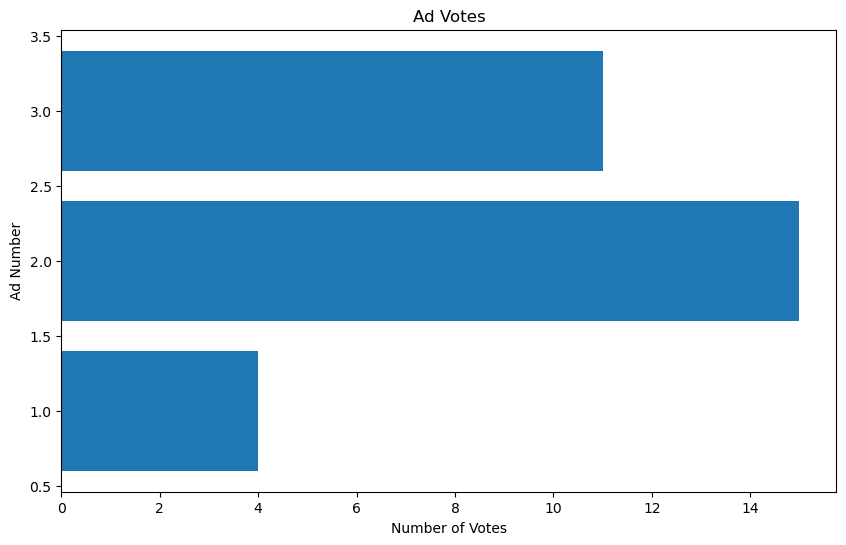

In [19]:
# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(list(votes.keys()), list(votes.values()))
# Add labels and title
plt.xlabel('Number of Votes')
plt.ylabel('Ad Number')
plt.title('Ad Votes')
# Show the plot
plt.show()


Finally, we pick the winner ad.

In [20]:
# picks the most voted ad
winner = max(votes, key=votes.get)
winner

2